In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
# Define the URL
URL = "https://www.uta-net.com/artist/4002/4/"

# Make a GET request to the URL
r = requests.get(URL)

# Write the response content to a file named "home.html"
with open("home.html", "wb") as f:
    f.write(r.content)

In [4]:
# Open and read home.html
with open("home.html", "r", encoding="utf-8") as file:
    html_content = file.read()
    soup = BeautifulSoup(html_content, "html.parser")

    # Find all the links with class "py-2 py-lg-0" and create absolute URLs
    links = [f"https://www.uta-net.com{link.get('href')}" for link in soup.find_all("a", class_="py-2 py-lg-0")]

# Write the links to a CSV file
with open("links.csv", "w", encoding="utf-8") as file:
    for link in links:
        file.write(f"{link}\n")

In [8]:
import requests
import time
from datetime import datetime
import os

# Read URLs from links.csv
url_list = []
with open("links.csv", "r", encoding="utf-8") as csv_file:
    for url in csv_file:
        clean_url = url.strip()
        url_list.append(clean_url)

# if the html_files folder exsist, Count the number of files in the html_files folder
if os.path.exists("html_files"):
    html_files_count = sum(len(files) for _, _, files in os.walk("html_files"))
else:
    # make directory
    os.mkdir("html_files")
    html_files_count = 0

# Download html files from clean_url
for clean_url in url_list[html_files_count:]:
    print(f"Downloading {clean_url}")
    response = requests.get(clean_url)
    current_time = datetime.now().strftime("%Y%m%d%H%M%S")
    with open(f"./html_files/{current_time}.html", "wb") as html_file:
        html_file.write(response.content)
    time.sleep(5)

KeyboardInterrupt: 

In [2]:
import glob
from bs4 import BeautifulSoup

html_files = glob.glob("html_files/*.html")

kashi_list = []
for html_file in html_files:
    with open(html_file, "r", encoding="utf-8") as file:
        html_content = file.read()
        soup = BeautifulSoup(html_content, "html.parser")
        kashi_area = soup.find("div", {"id": "kashi_area"})
        if kashi_area:
            kashi_text = kashi_area.text
            kashi_list.append(kashi_text)

# Write kashi_text to kashi.csv separated by commas
with open("kashi.csv", "w", encoding="utf-8") as kashi_file:
    for kashi_text in kashi_list:
        kashi_file.write(f"{kashi_text},")

In [3]:
# open kashi.csv and combine one string variable without pandas
with open("kashi.csv", "r", encoding="utf-8") as kashi_file:
    combined_string = ",".join(line.strip() for line in kashi_file)
print(combined_string)

# morphological analysis of japanese with python exclude mecab
# You can perform morphological analysis of Japanese text in Python using libraries like Janome or SudachiPy, which can exclude MeCab as an option.
# Here is an example using Janome:
from janome.tokenizer import Tokenizer
import csv

# text = ""
text = combined_string
tokenizer = Tokenizer()
tokens = tokenizer.tokenize(text)

# Prepare data for CSV
rows = [[token.surface, token.part_of_speech] for token in tokens]

# Write to CSV
with open('kashi_janome.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(["Token", "Part of Speech"])  # Writing headers
    writer.writerows(rows)

あかりをつけましょ　ぼんぼりにおはなをあげましょ　もものはなごにんばやしの　ふえたいこきょうはたのしい　ひなまつりおだいりさまと　おひなさまふたりならんで　すましがおおよめにいらした　ねえさまによくにたかんじょの　しろいかおきんのびょうぶに　うつるひをかすかにゆする　はるのかぜすこししろざけ　めされたかあかいおかおの　うだいじんきものをきかえて　おびしめてきょうはわたしも　はれすがたはるのやよいの　このよきひなによりうれしい　ひなまつり,秋の夕日に照る山紅葉(もみじ)濃(こ)いも薄いも数ある中に松をいろどる楓(かえで)や蔦(つた)は山のふもとの裾模様(すそもよう)渓(たに)の流(ながれ)に散り浮く紅葉波にゆられて離れて寄って赤や黄色の色様々に水の上にも織る錦,あるひ　もりの　なかくまさんに　であったはな　さく　もりの　みちくまさんに　であったくまさんの　いうことにゃおじょうさん　おにげなさいスタコラ　サッサッサのサスタコラ　サッサッサのサところが　くまさんがあとから　ついてくるトコトコ　トッコトッコトトコトコ　トッコトッコトおじょうさん　おまちなさいちょっと　おとしものしろい　かいがらのちいさな　イヤリングあら　くまさん　ありがとうおれいに　うたいましょうラララ　ララララララララ　ララララララララ　ララララララララ　ラララララ,


In [5]:
# open kashi_janome.csv and extract words that is nouns
import csv
from janome.tokenizer import Tokenizer

nouns = []
with open("kashi_janome.csv", "r", newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader)  # Skip headers
    for row in reader:
        if '名詞' in row[1]:
            nouns.append(row[0])

print(nouns)

# save nouns to csv
with open('kashi_nouns.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerows([nouns])

['あかり', 'ぼんぼり', 'お', 'はな', 'もも', 'はな', 'ご', 'ばやし', 'ふえ', 'たいこ', 'きょう', 'ひな', 'まつり', 'おだ', 'さま', 'お', 'ひな', 'さま', 'ふたり', 'お', 'お', 'さま', 'ょの', 'かお', 'きん', 'びょうぶ', 'つる', 'かすか', 'はる', 'かぜ', 'ざけ', 'お', 'かお', 'だい', 'じん', 'きもの', 'お', 'びしめてきょうはわたしも', 'がた', 'はるの', 'やよい', 'ひな', 'ひな', 'まつり', ',', '秋', '夕日', '山', '紅葉', '(', 'もみじ', ')', '(', 'こ', ')', 'いも', '数', '中', '松', '楓', '(', ')', '蔦', '(', 'つた', ')', '山', 'ふもと', '裾模様', '(', 'すそ', 'よう', ')', '渓', '(', ')', '流', '(', ')', '紅葉', '波', '赤', '黄色', '色', '様々', '水', '上', '錦', ',', 'なか', 'くま', 'さん', 'はな', 'さく', 'みち', 'くま', 'さん', 'くま', 'さん', 'こと', 'おじょうさん', 'お', 'スタコラ', 'サッサッサ', 'サスタコラ', 'サッサッサ', 'サ', 'くま', 'さん', 'あと', 'トッコトッコトトコトコ', 'トッコトッコト', 'おじょうさん', 'お', 'まち', 'おと', 'かい', 'がら', 'イヤリング', 'あら', 'くま', 'さん', 'お', 'れい', 'ラララ', 'ララララララララ', 'ララララララララ', 'ララララララララ', 'ラララララ', ',']


(-0.5, 899.5, 899.5, -0.5)

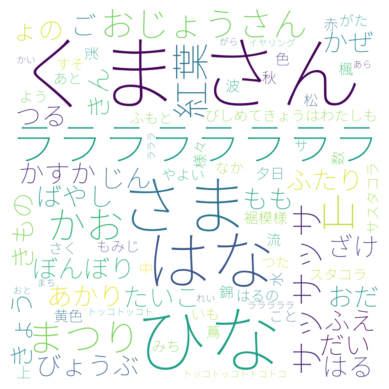

In [1]:
import os
import csv
from wordcloud import WordCloud
from datetime import datetime
import matplotlib.pyplot as plt

nouns = []

# Read nouns from kashi_nouns.csv
with open('kashi_nouns.csv', 'r', newline='', encoding='utf-8') as file:
    reader = csv.reader(file)
    for row in reader:
        nouns.extend(row)

# Generate word cloud
wordcloud = WordCloud(
    width=900,
    height=900,
    background_color='white',
    font_path='Noto_Sans_JP/NotoSansJP-VariableFont_wght.ttf',
    stopwords={"ん", "お", "の", "こ", "（", "）", "お", "お"}
).generate(' '.join(nouns))

# Create folder if it doesn't exist
folder_name = "wordcloud"
if not os.path.exists(folder_name):
    os.mkdir(folder_name)

# Save word cloud image
current_time = datetime.now().strftime("%Y%m%d%H%M%S")
wordcloud.to_file(f"./wordcloud/{current_time}.png")

# Display word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')